In [1]:
import pandas as pd
import nfl_data_py as nfl
from datetime import date
from team_functions import map_team_abbreviations

In [2]:
# update game list
# !python download_games.py
df = nfl.import_schedules(years=range(1999, 2026))
df = map_team_abbreviations(df)
completed_games = df[df['result'].notna()]
upcoming_games = df[df['result'].isna()]

In [3]:
elo_prep = completed_games[['game_id','season','game_type','gameday', 'week','away_team','home_team','away_score','home_score']]




In [62]:
from elo_functions import calculate_elo_history, create_team_elo_chart

# 1. CALCULATE ELO HISTORY
elo_prep = calculate_elo_history(elo_prep, k=10)

# 2. CREATE THE CHART
team_elo_chart = create_team_elo_chart(elo_prep)
team_elo_chart

team                 ARI          ATL          BAL          BUF          CAR  \
season week                                                                    
1999   1     1500.000000  1500.000000  1500.000000  1500.000000  1500.000000   
       2     1505.000000  1495.000000  1495.000000  1495.000000  1495.000000   
       3     1500.000000  1490.143872  1490.143872  1500.000000  1490.143872   
       4     1495.002070  1485.357539  1495.143872  1504.856128  1495.142837   
       5     1490.215707  1480.498338  1500.003072  1509.930149  1495.142837   
...                  ...          ...          ...          ...          ...   
2025   8     1429.956759  1459.723340  1575.943166  1622.138363  1397.688001   
       9     1426.946465  1455.008645  1578.877739  1624.293440  1395.532924   
       10    1433.317071  1450.733702  1582.549102  1630.145484  1403.008171   
       11    1430.059151  1446.460927  1587.120189  1623.117255  1398.939389   
       12    1430.059151  1446.460927  1587.120189  1626.838133  1398.939389   

team                 CHI          CIN          CLE          DAL          DEN  \
season week                                                                    
1999   1     1500.000000  1500.000000  1500.000000  1500.000000  1500.000000   
       2     1505.000000  1495.000000  1495.000000  1505.000000  1495.000000   
       3     1499.856128  1490.071951  1490.143872  1505.000000  1490.000000   
       4     1494.860269  1485.072986  1485.143872  1509.856128  1485.143872   
       5     1499.932160  1480.428041  1480.570397  1514.642491  1480.143902   
...                  ...          ...          ...          ...          ...   
2025   8     1423.305797  1523.103349  1421.547917  1530.248655  1490.924751   
       9     1420.371224  1516.044948  1421.547917  1524.685143  1496.488263   
       10    1426.714301  1516.044948  1417.683879  1524.685143  1501.044779   
       11    1431.137878  1509.701870  1412.116852  1518.314536  1504.853243   
       12    1431.137878  1509.701870  1412.116852  1518.314536  1504.853243   

team         ...           NO          NYG          NYJ          PHI  \
season week  ...                                                       
1999   1     ...  1500.000000  1500.000000  1500.000000  1500.000000   
       2     ...  1505.000000  1505.000000  1495.000000  1495.000000   
       3     ...  1505.000000  1499.856128  1490.000000  1490.000000   
       4     ...  1499.856128  1495.002069  1485.145941  1485.143872   
       5     ...  1494.784237  1499.860236  1490.145911  1480.285705   
...          ...          ...          ...          ...          ...   
2025   8     ...  1476.498032  1391.493867  1371.054165  1619.285864   
       9     ...  1472.310010  1389.371133  1371.054165  1619.285864   
       10    ...  1468.479952  1386.481394  1378.112566  1621.408598   
       11    ...  1468.479952  1382.057818  1383.679594  1625.767589   
       12    ...  1468.479952  1382.057818  1383.679594  1625.767589   

team                 PIT          SEA           SF           TB          TEN  \
season week                                                                    
1999   1     1500.000000  1500.000000  1500.000000  1500.000000  1500.000000   
       2     1505.000000  1495.000000  1495.000000  1495.000000  1505.000000   
       3     1509.856128  1500.143872  1500.143872  1500.000000  1509.856128   
       4     1504.716394  1505.283606  1505.141801  1504.856128  1514.856128   
       5     1499.718405  1505.283606  1510.281565  1499.712286  1509.716364   
...                  ...          ...          ...          ...          ...   
2025   8     1564.598319  1552.237353  1552.086503  1533.424036  1411.977993   
       9     1559.809868  1555.981039  1545.781875  1533.424036  1408.246978   
       10    1564.039607  1559.658454  1548.671614  1537.612058  1408.246978   
       11    1558.244781  1562.916374  1543.819782  1532.215858  1404.600327   
       12    1558.244

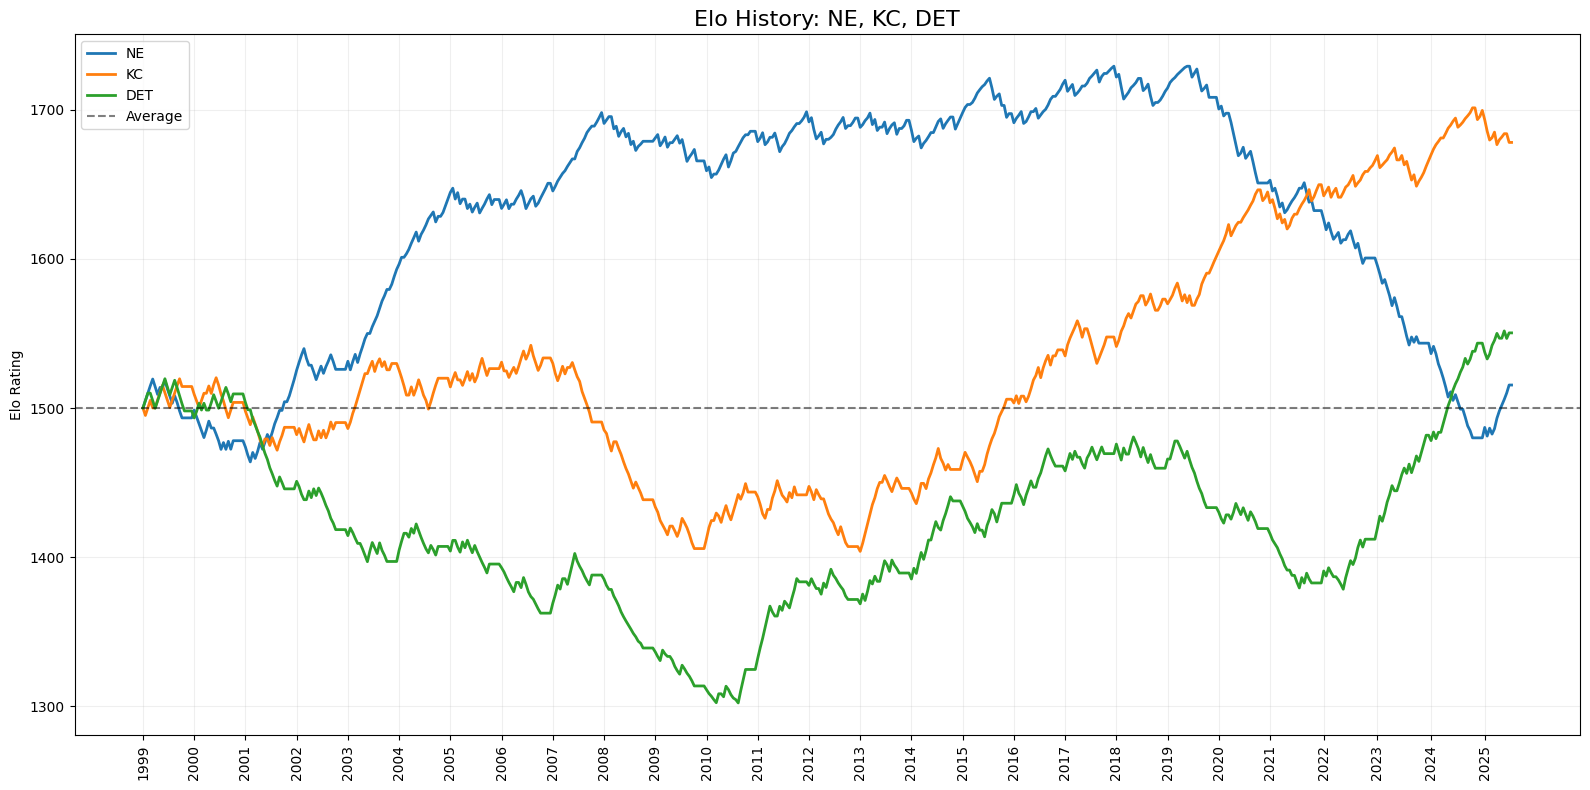

In [63]:
from plotting_functions import plot_elo_every_season

plot_elo_every_season(['NE', 'KC', 'DET'], team_elo_chart)

In [64]:
elo_prep

,game_id,season,game_type,gameday,week,away_team,home_team,away_score,home_score,home_elo,away_elo,home_win_prob,away_win_prob
0,1999_01_MIN_ATL,1999,REG,1999-09-12,1,MIN,ATL,17.0,14.0,1500.000000,1500.000000,0.500000,0.500000
1,1999_01_KC_CHI,1999,REG,1999-09-12,1,KC,CHI,17.0,20.0,1500.000000,1500.000000,0.500000,0.500000
2,1999_01_PIT_CLE,1999,REG,1999-09-12,1,PIT,CLE,43.0,0.0,1500.000000,1500.000000,0.500000,0.500000
3,1999_01_OAK_GB,1999,REG,1999-09-12,1,LV,GB,24.0,28.0,1500.000000,1500.000000,0.500000,0.500000
4,1999_01_BUF_IND,1999,REG,1999-09-12,1,BUF,IND,14.0,31.0,1500.000000,1500.000000,0.500000,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7151,2025_11_BAL_CLE,2025,REG,2025-11-16,11,BAL,CLE,23.0,16.0,1412.116852,1587.120189,0.233165,0.766835
7152,2025_11_KC_DEN,2025,REG,2025-11-16,11,KC,DEN,19.0,22.0,1504.853243,1678.230795,0.266117,0.733883
7153,2025_11_DET_PHI,2025,REG,2025-11-16,11,DET,PHI,9.0,16.0,1625.767589,1550.410665,0.588187,0.411813
7154,2025_11_DAL_LV,2025,REG,2025-11-17,11,DAL,LV,33.0,16.0,1412.816869,1518.314536,0.339959,0.660041


In [68]:
from sklearn.metrics import brier_score_loss, accuracy_score, confusion_matrix

In [69]:
min_season = elo_prep['season'].min()
elo_prep_testing = elo_prep[elo_prep['season'] > min_season + 1]

win_outcome = elo_prep_testing['home_score'] > elo_prep_testing['away_score']
win_outcome = win_outcome.astype(int)

win_predict_bin = elo_prep_testing['home_win_prob'] > 0.5
win_predict_bin = win_predict_bin.astype(int)

brier_score = brier_score_loss(win_outcome, elo_prep_testing['home_win_prob'])
accuracy = accuracy_score(win_outcome, win_predict_bin)
confusion = confusion_matrix(win_outcome, win_predict_bin)

print(brier_score)
print(accuracy)
print(confusion)

0.23603498278803398
0.6012353118409159
[[1760 1144]
 [1503 2231]]


In [70]:
win_outcome.shape[0]

6638

In [82]:
# random guessing
import numpy as np
outcome_guessed = np.random.rand(win_outcome.shape[0])
outcome_guessed_bin = outcome_guessed > 0.5
brier_score_random = brier_score_loss(win_outcome, outcome_guessed)
accuracy_random = accuracy_score(win_outcome, outcome_guessed_bin)

print(brier_score_random)
print(accuracy_random)

home_always_wins = np.ones(win_outcome.shape[0])
home_always_wins_bin = home_always_wins.astype(int)
brier_score_home = brier_score_loss(win_outcome, home_always_wins)
accuracy_home = accuracy_score(win_outcome, home_always_wins_bin)

print(brier_score_home)
print(accuracy_home)    


0.331182458972789
0.4983428743597469
0.43748116902681533
0.5625188309731847


In [ ]:

from elo_functions import elo_change_calc
elo_change_calc(1500,1600)

19.201949994086554

In [80]:
def calc_elo_win(A, B):
    awin = 1 / (1 + 10**( (B - A) / 400))
    return(awin)

def elo_win_prob(elo_prep):
    ''' to be run after you calculate elo history '''
    elo_prep['home_win_prob']=elo_prep.apply(lambda row: calc_elo_win(row['home_elo'], row['away_elo']), axis=1)
    elo_prep['away_win_prob']=1-elo_prep['home_win_prob']
    return elo_prep

def get_elo_metrics(elo_prep):
    ''' to be run after you calculate elo history '''
    min_season = elo_prep['season'].min()
    elo_prep_testing = elo_prep[elo_prep['season'] > min_season + 1]

    win_outcome = elo_prep_testing['home_score'] > elo_prep_testing['away_score']
    win_outcome = win_outcome.astype(int)

    win_predict_bin = elo_prep_testing['home_win_prob'] > 0.5
    win_predict_bin = win_predict_bin.astype(int)

    brier_score = brier_score_loss(win_outcome, elo_prep_testing['home_win_prob'])
    accuracy = accuracy_score(win_outcome, win_predict_bin)
    confusion = confusion_matrix(win_outcome, win_predict_bin)
    return brier_score, accuracy, confusion

elo_20 = calculate_elo_history(elo_prep, k=20)
elo_20 = elo_win_prob(elo_20)
brier_20, accuracy_20, confusion_20 = get_elo_metrics(elo_20)
print(brier_20, '\n', accuracy_20, '\n', confusion_20)

0.23309194551637444 
 0.6132871346791202 
 [[1817 1087]
 [1480 2254]]
